## US Visa Prediction Project

### About
--- 

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

1) Problem statement.
  - OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants   certifications.
  - As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**
  - This model is to check if Visa get approved or not based on the given dataset.
  - This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

2) Data Collection.
  - The Dataset is part of Office of Foreign Labor Certification (OFLC)
  - The data consists of 25480 Rows and 12 Columns
  - [Dataset](https://www.kaggle.com/datasets/moro23/easyvisa-dataset)

### Columns Info:

---
- `case_id`: ID of each visa application </br>

- `continent`: Information of continent the employee </br>

- `education_of_employee`: Information of education of the employee </br>

- `has_job_experience`: Does the employee has any job experience? Y= Yes; N = No </br>

- `requires_job_training`: Does the employee require any job training? Y = Yes; N = No </br>

- `no_of_employees`: Number of employees in the employer's company </br>

- `yr_of_estab`: Year in which the employer's company was established </br>

- `region_of_employment`: Information of foreign worker's intended region of employment in the US.</br>

- `prevailing_wage`: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The
   purpose of</br> the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or
   similar </br>service in the same area of employment.</br>

- `unit_of_wage`: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.</br>

- `full_time_position`: Is the position of work full-time? Y = Full Time Position; N = Part Time Position </br>

- `case_status`: Flag indicating if the Visa was certified or denied </br>


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


### Note:
- `no_of_employees` has negative values which is not possible.
- `prevailing_wage` min value possibly has some issue.Too Low

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"Total numerical features: {len(numerical_features)} and they are: {numerical_features} \n")
print(f"Total categorical features: {len(categorical_features)} and they are: {categorical_features}")

Total numerical features: 3 and they are: ['no_of_employees', 'yr_of_estab', 'prevailing_wage'] 

Total categorical features: 9 and they are: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [10]:
# proportion of count data on ccategorical_features
for col in categorical_features: 
    print(df[col].value_counts(normalize = True) * 100)
    print(' - ' * 30)

case_id
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
EZYV05       0.003925
               ...   
EZYV25476    0.003925
EZYV25477    0.003925
EZYV25478    0.003925
EZYV25479    0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dt

### Note: 
---
- `case_id`: All values are unique. Need to drop this column
- `continent`: Highly biased towards Asia. Maybe we can just make 3 values: Asia , Europe North America , South America and Other.
- `unit_of_wage`: Yearly ~90% and Hour , Week , Month are total 10%. So possibly make a new feature `is_year`
- `case_status`: Certified ~66% and Denied ~33% so need to balance the data.

## Univariate Analysis

### Numerical Columns

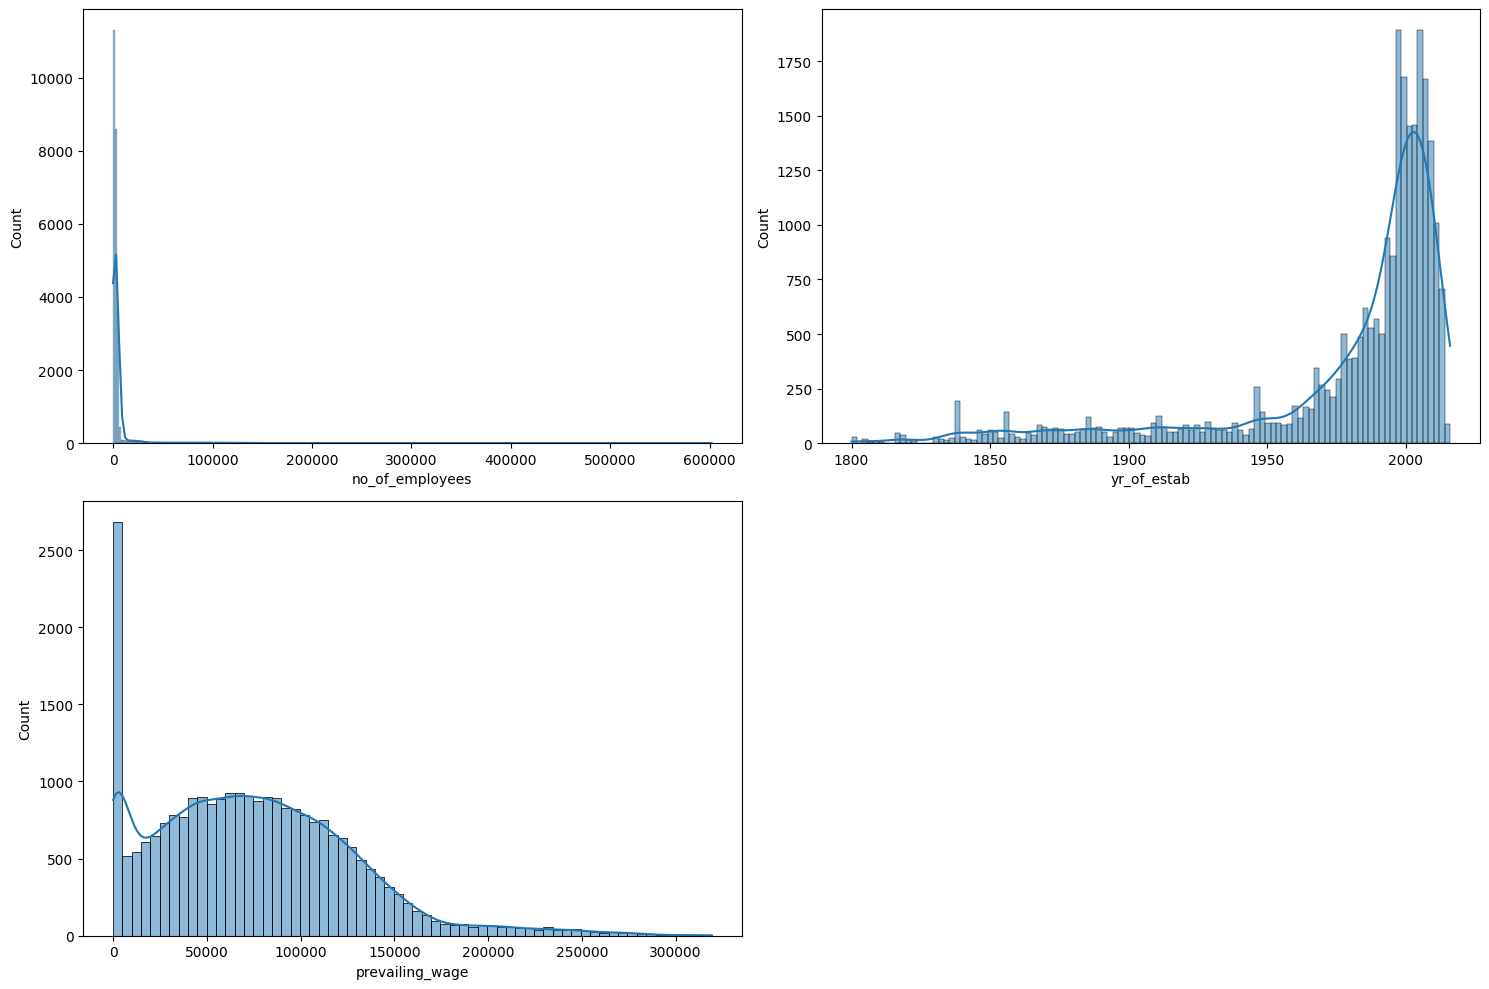

In [12]:
plt.figure(figsize = (15 , 10))

for i in range(len(numerical_features)): 
    plt.subplot(2 , 2 , i + 1) 
    sns.histplot(data = df , x = numerical_features[i] , kde = True)
    plt.xlabel(numerical_features[i])

plt.tight_layout()
plt.show()

### Note:
- `no_of_employees` column looks more skewed. check for outliers.
- `year_of_estab` is a discreate feature.
- `prevaling_wage` is right-skewed.

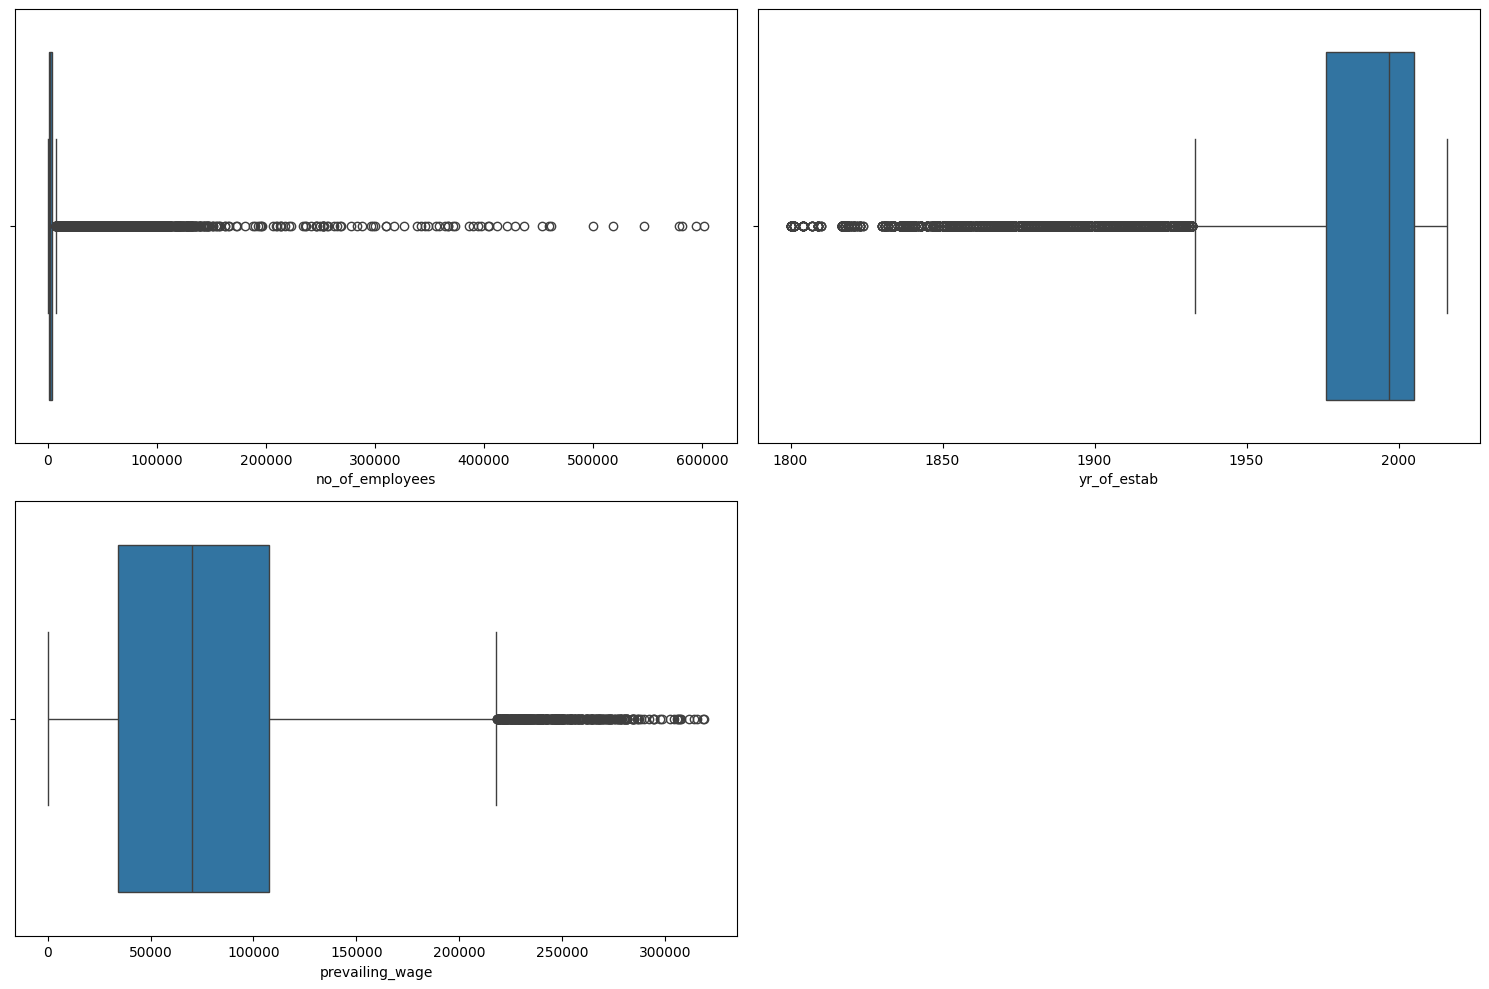

In [24]:
plt.figure(figsize = (15 , 10))

for i in range(len(numerical_features)): 
    plt.subplot(2 , 2 , i + 1) 
    sns.boxplot(data = df , x = numerical_features[i])
    plt.xlabel(numerical_features[i])

plt.tight_layout()
plt.show()

In [13]:
numerical_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [14]:
df['no_of_employees'].describe()

count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [17]:
df[df['no_of_employees'] < 0].shape

(33, 12)

In [18]:
df[df['no_of_employees'] == 0].shape

(0, 12)

In [22]:
df[df['no_of_employees'] > 30000].shape

(764, 12)

In [23]:
df['prevailing_wage'].describe()

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

### Note:
---
- `no_of_employees` there are 33 rows where value is less than 0

## Categorical Features

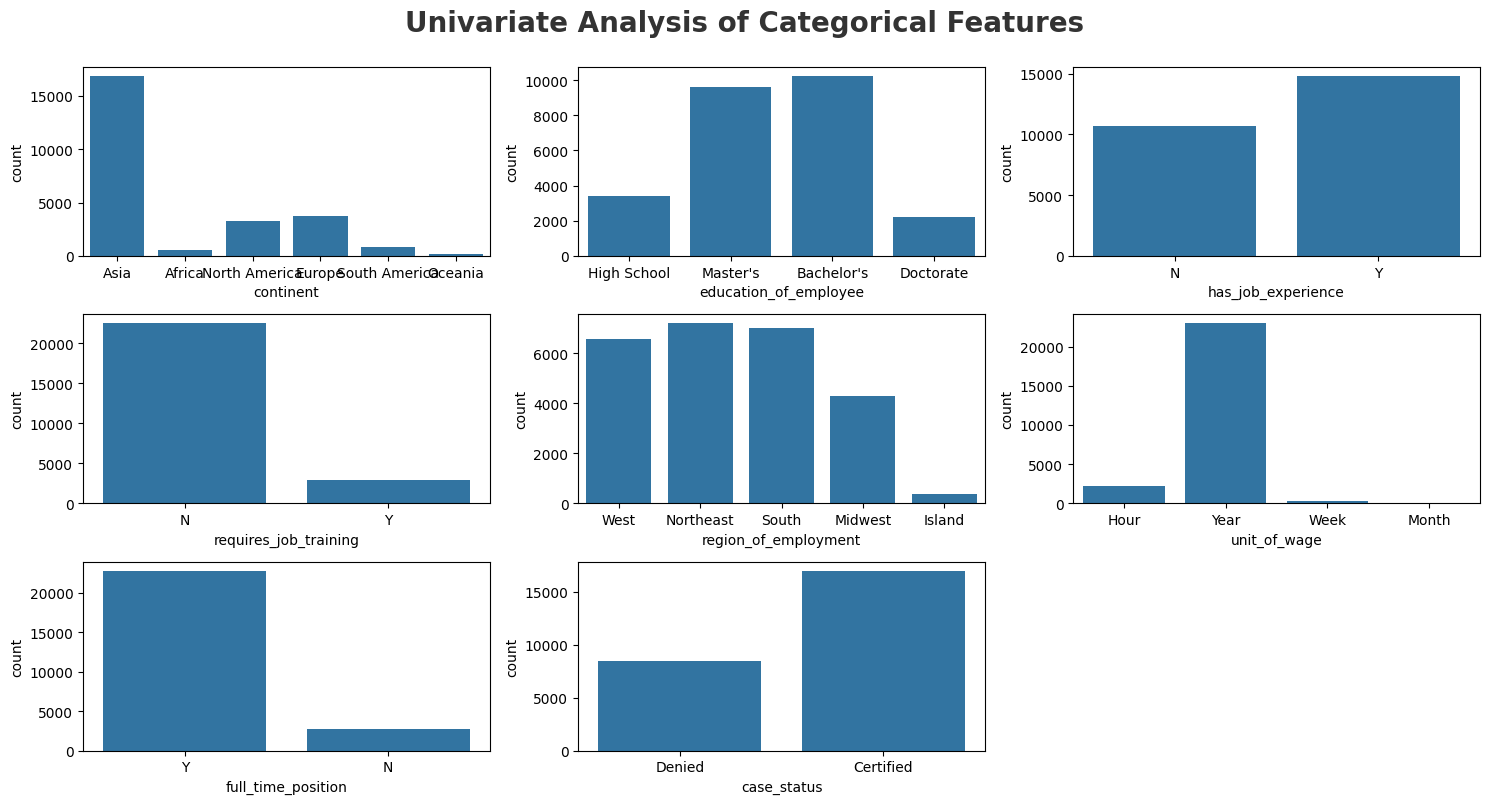

In [25]:
categorical_features.remove('case_id')
plt.figure(figsize = (15 , 8))

plt.suptitle("Univariate Analysis of Categorical Features" , fontsize = 20 , fontweight = 'bold' , alpha = 0.8 , y = 1)

for i in range(len(categorical_features)): 
    plt.subplot(3 , 3 , i + 1) 
    sns.countplot(data = df , x = categorical_features[i])
    plt.xlabel(categorical_features[i])

plt.tight_layout()
plt.show()

## Multivariate Analysis

### Numerical Feature

In [27]:
discreate_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]
continuous_features = [feature for feature in numerical_features if len(df[feature].unique()) > 25]

print(f"Total discreate features: {len(discreate_features)} and they are: {discreate_features} \n")
print(f"Total continuous features: {len(continuous_features)} and they are: {continuous_features}")

Total discreate features: 0 and they are: [] 

Total continuous features: 3 and they are: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


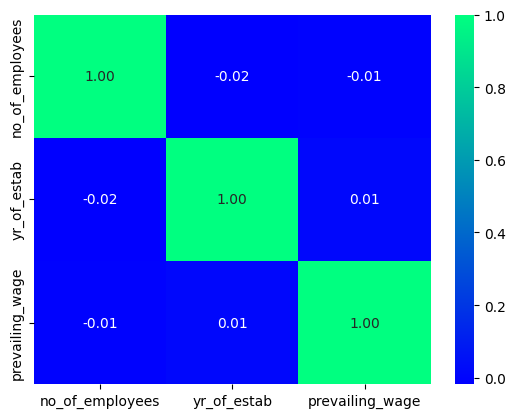

In [29]:
sns.heatmap(df[numerical_features].corr() , cbar = True , cmap = 'winter' , annot = True , fmt = ".2f")
plt.show()

### Note: 
- No multi-colinearity between numerical features.

In [32]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Categorical Features

In [30]:
from scipy.stats import chi2_contingency

In [33]:
chi_test = [] 

for feature in categorical_features: 
    if chi2_contingency(pd.crosstab(df['case_status'] , df[feature]))[1] < 0.05: 
        chi_test.append("Reject Null Hypothesis")
    else:
        chi_test.append("Failed to Reject Null Hypothesis")

result = pd.DataFrame(data = {"categorical_features" : categorical_features,
                               "Hypothesis Result" : chi_test
                             }
                     )

result

,categorical_features,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Failed to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


### Note: 
- `requires_job_training` Failed to Reject Null Hypothesis which means it doesn't correlate with target column.

In [34]:
numerical_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

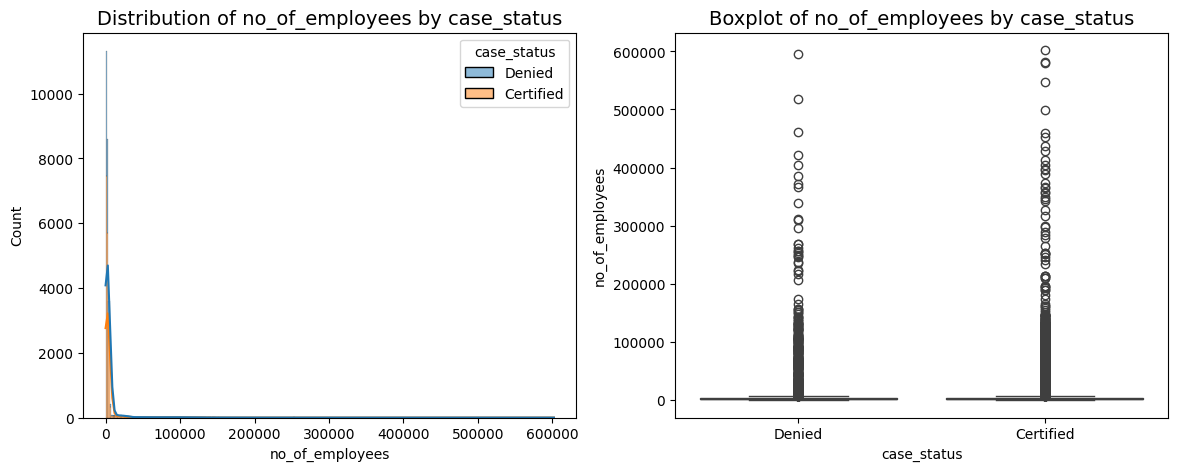

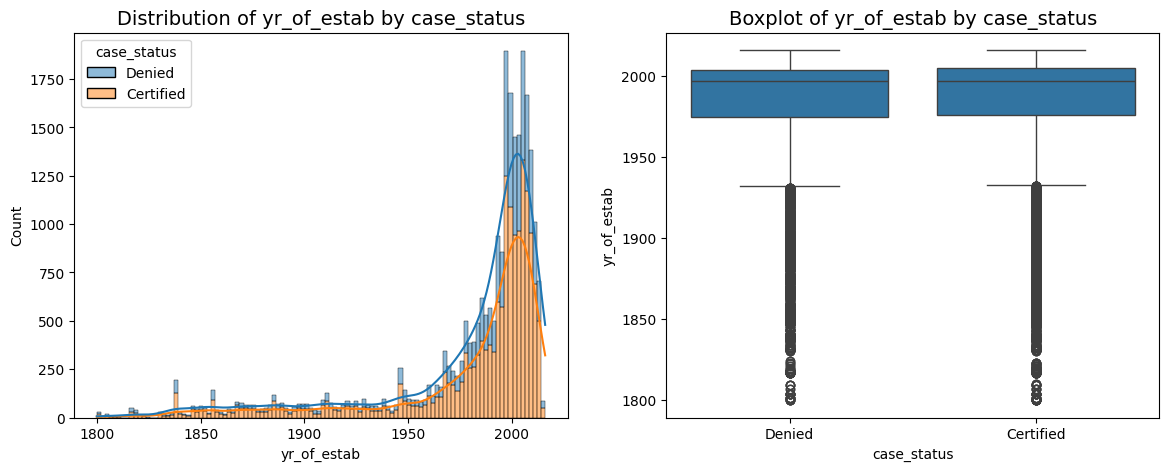

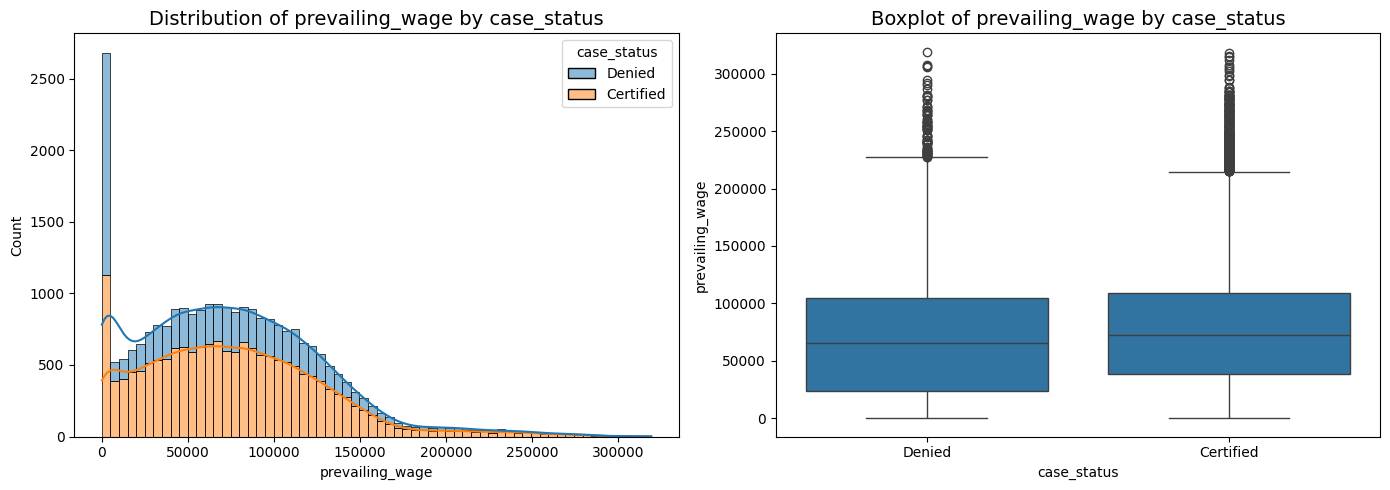

In [36]:
for feature in numerical_features:
    plt.figure(figsize=(14, 5))

    # Histplot with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data = df, x = feature, hue = 'case_status' , kde = True, multiple = "stack")
    plt.title(f"Distribution of {feature} by case_status", fontsize = 14)
    plt.xlabel(feature)
    plt.ylabel("Count")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data = df, x = 'case_status' , y = feature)
    plt.title(f"Boxplot of {feature} by case_status", fontsize = 14)
    plt.xlabel('case_status')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Initial Analysis Report
---

- `no_of_employees` has many outliers which can be Handled in Feature Engineering and `no_of_employees` is Right Skewed.
- `yr_of_estab` is left skewed and some outliers below the lower bound of Box plot.
- `prevailing_wage` is right skewed with outliers above upper bound of box plot.
- There are No missing values in the dataset.
- The `case_id` column can be deleted because each row has unique values.
- The `case_status` column is the `target` to predict.
- In the Categorical column, features can be made Binary numerical in feature Encoding.

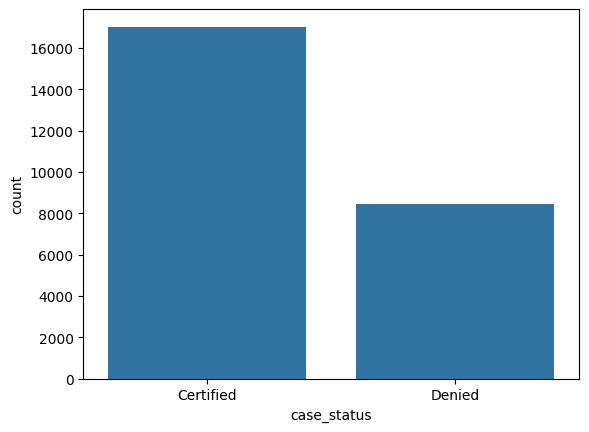

In [37]:
sns.barplot(df['case_status'].value_counts())
plt.show()

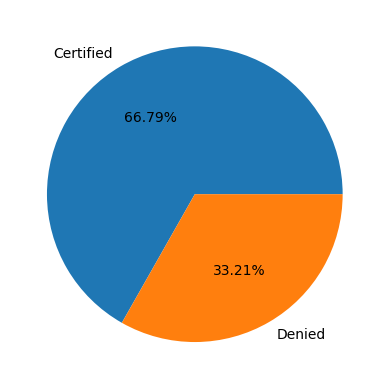

In [38]:
percentage = df['case_status'].value_counts(normalize = True) * 100
labels = ['Certified' , "Denied"]

plt.pie(percentage , labels = labels , autopct = '%1.2f%%')
plt.show()

### Note: 
- Target fearure `case_status` is imbalanced. So need to apply some balancing technique.

In [39]:
# does applicant continent has any impact on case status? 

df.groupby('continent')['case_status'].value_counts(normalize = True).to_frame() * 100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

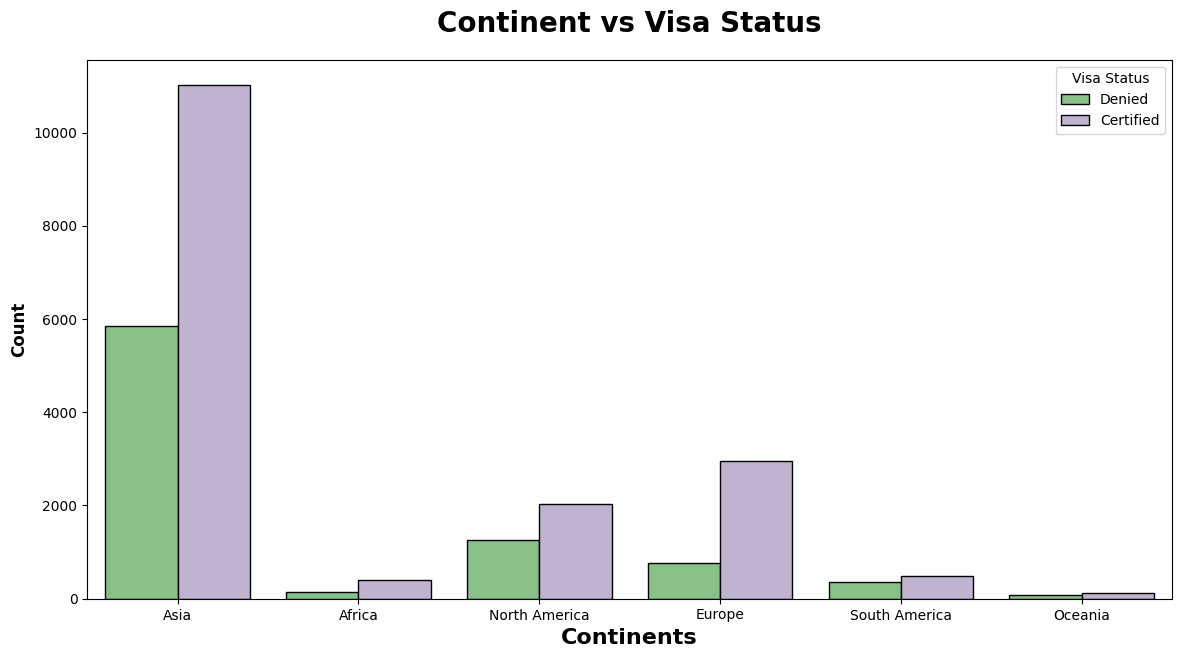

In [40]:
plt.subplots(figsize = (14,7))

sns.countplot(x = "continent" , hue = "case_status" , data = df, ec = "black" , palette = "Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight = "bold" , fontsize = 12)
plt.xlabel("Continents", weight = "bold", fontsize = 16)
plt.legend(title = "Visa Status" , fancybox = True)
plt.show()

In [41]:
df2 = df.copy()

C:\Users\tipto\AppData\Local\Temp\ipykernel_4652\4062120739.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


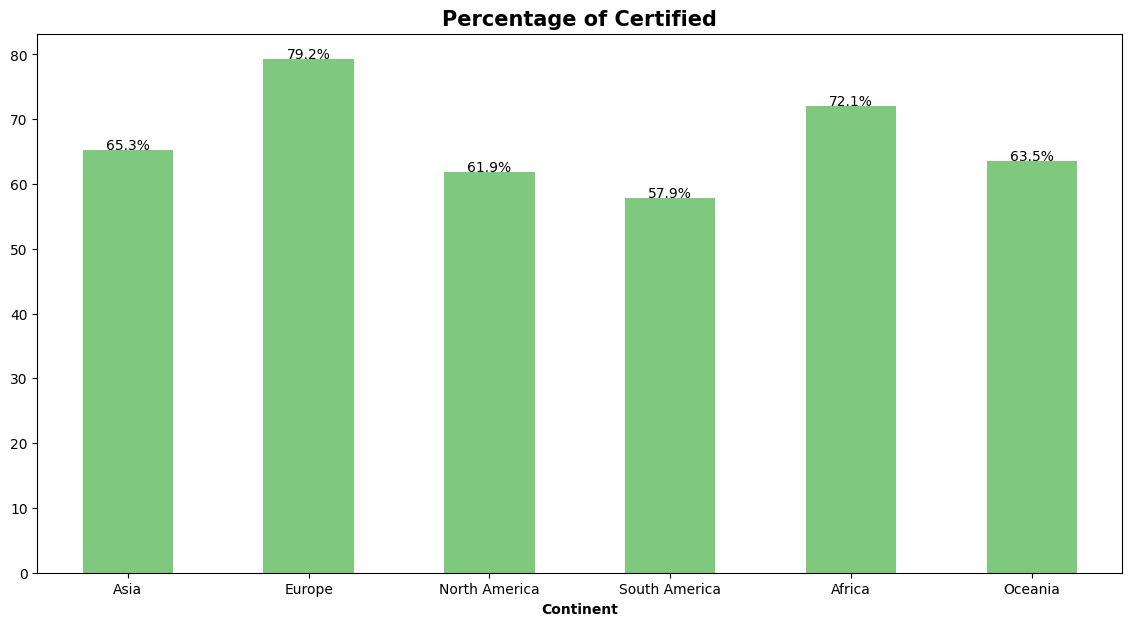

In [42]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### Report:

- As per the Chart Asia applicants applied more than other continents.
- 65.3% of Certified applications are from Asia.
- This is followed by Europe with 79.2% of Certified applications.
- Highest chance of getting certified if you are from Europe and followed by Africa.

In [43]:
# Does applicant education has any impact on Visa status ? 

df.groupby('education_of_employee')['case_status'].value_counts(normalize = True).to_frame() * 100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

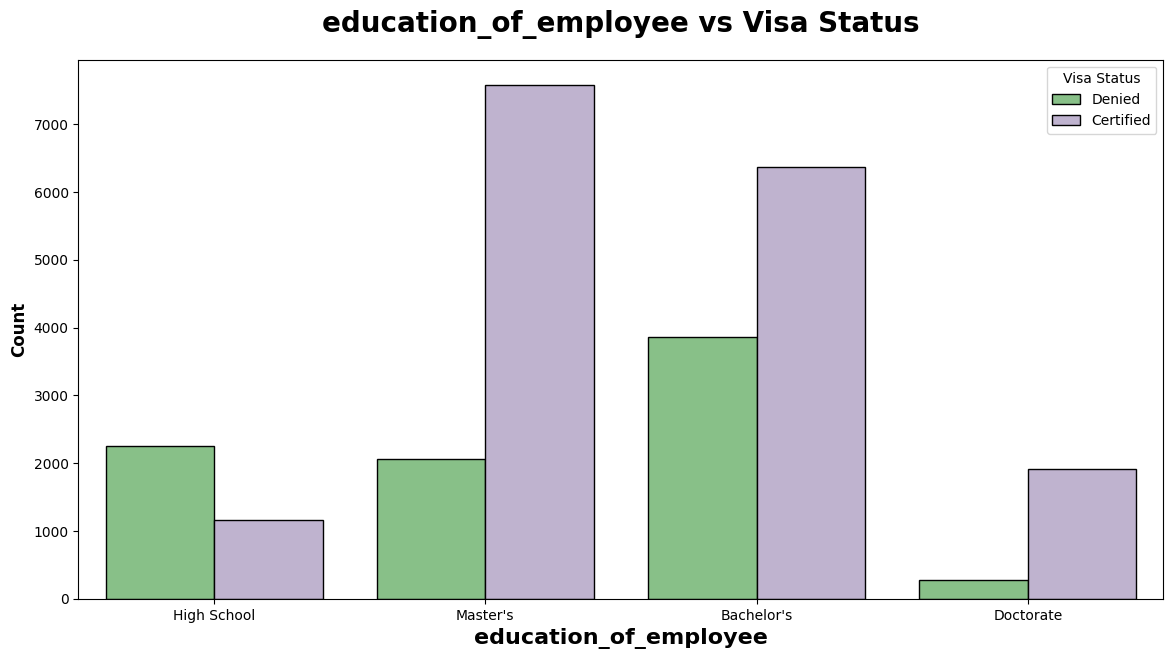

In [44]:
plt.subplots(figsize = (14,7))

sns.countplot(x = "education_of_employee" , hue = "case_status" , data = df, ec = "black" , palette = "Accent")
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight = "bold" , fontsize = 12)
plt.xlabel("education_of_employee", weight = "bold", fontsize = 16)
plt.legend(title = "Visa Status" , fancybox = True)
plt.show()

C:\Users\tipto\AppData\Local\Temp\ipykernel_4652\936321740.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


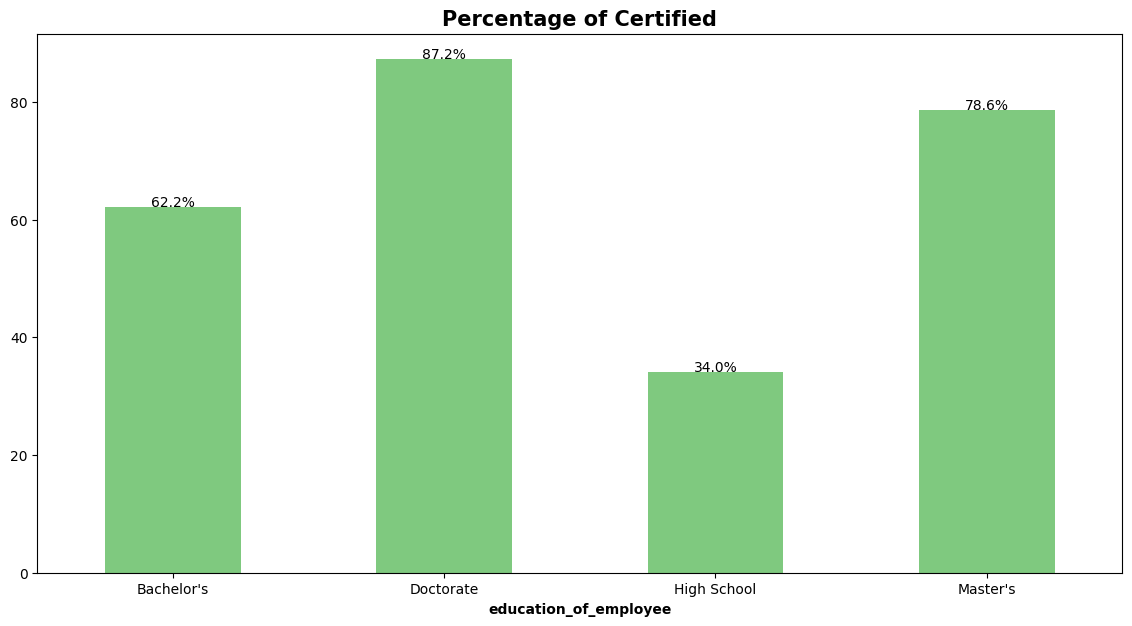

In [45]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### Insights

- education status has high impact.
- Doctorate and Master's graduates have higher cange of being accepted then the others

In [46]:
# Does applicant's previous work experience has any impact on Visa status ?

df.groupby('has_job_experience')['case_status'].value_counts(normalize = True).to_frame() * 100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

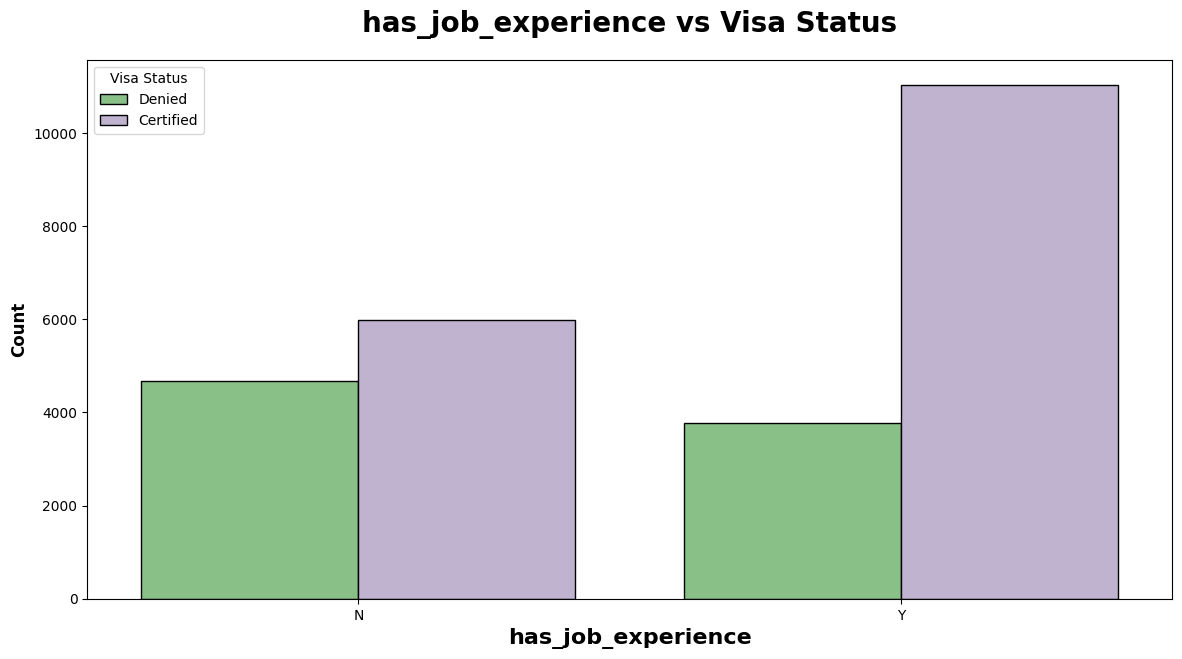

In [47]:
plt.subplots(figsize = (14,7))

sns.countplot(x = "has_job_experience" , hue = "case_status" , data = df, ec = "black" , palette = "Accent")
plt.title("has_job_experience vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight = "bold" , fontsize = 12)
plt.xlabel("has_job_experience", weight = "bold", fontsize = 16)
plt.legend(title = "Visa Status" , fancybox = True)
plt.show()

C:\Users\tipto\AppData\Local\Temp\ipykernel_4652\1580069743.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


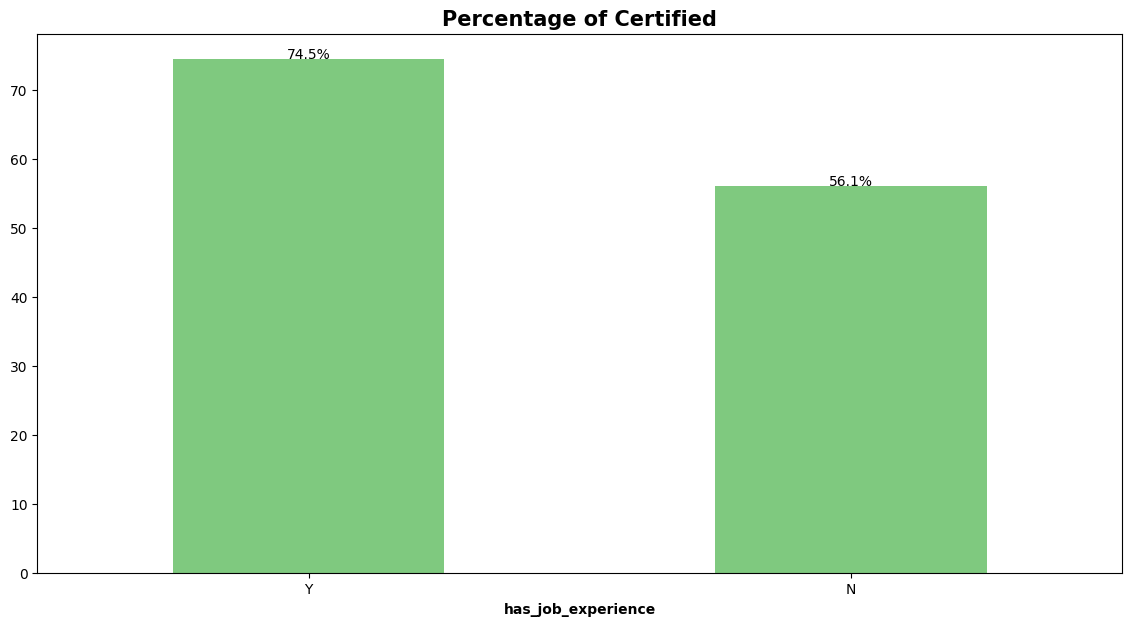

In [48]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### Report

- People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
- People with No previous work experience has been certified 56% and denied 43%.
- This means work experience has effect on Visa status.
- There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

In [54]:
df['requires_job_training'].value_counts(normalize = True) * 100

requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64

In [49]:
# If the Employee requires job training, does it make any impact on visa status?

df.groupby('requires_job_training')['case_status'].value_counts(normalize = True).to_frame() * 100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

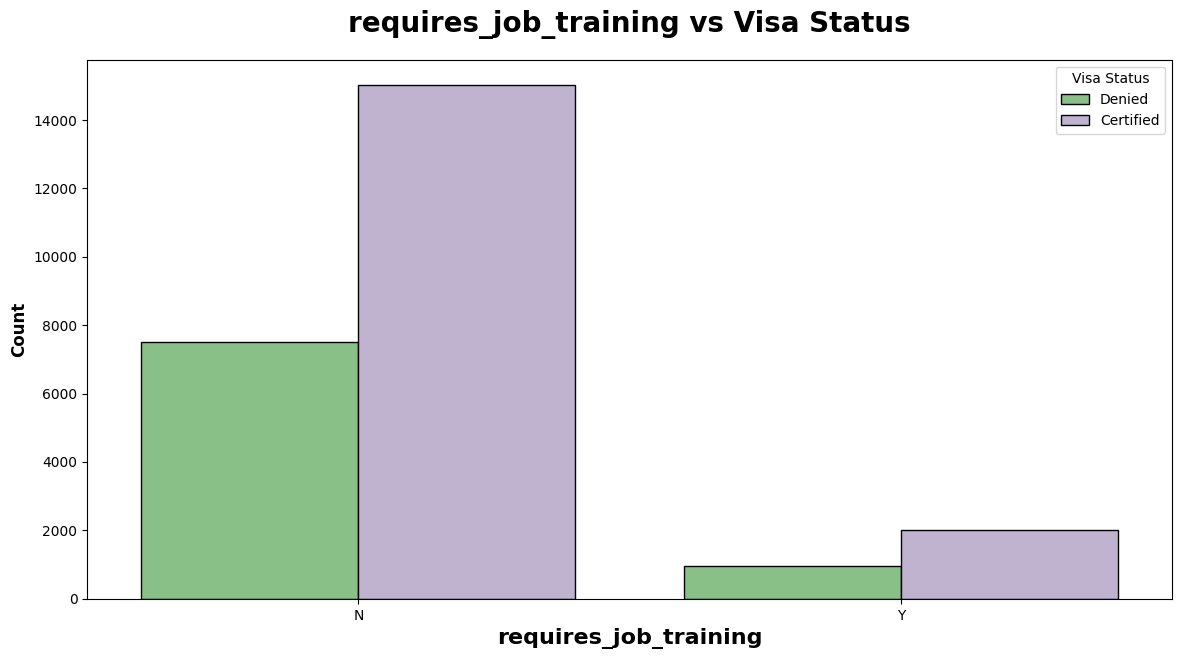

In [50]:
plt.subplots(figsize = (14,7))

sns.countplot(x = "requires_job_training" , hue = "case_status" , data = df, ec = "black" , palette = "Accent")
plt.title("requires_job_training vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight = "bold" , fontsize = 12)
plt.xlabel("requires_job_training", weight = "bold", fontsize = 16)
plt.legend(title = "Visa Status" , fancybox = True)
plt.show()

C:\Users\tipto\AppData\Local\Temp\ipykernel_4652\2732762475.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


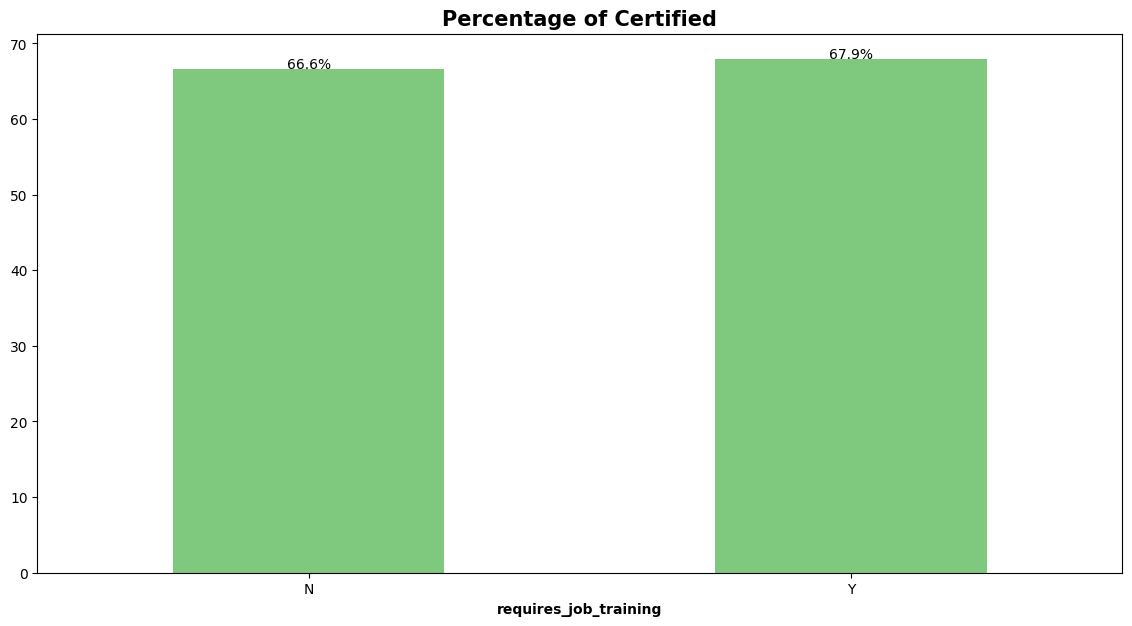

In [52]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### Report

- employee requires job training and it doesn't have any effect on Visa status.
- 88% of applicant don't require job training.
- 63% of people who doesnt want job training got certified.
- For employees who require job training 67% of people get certified.
- As we checked in Chi-Squared test this feature doesn't have much impact on target variable.

C:\Users\tipto\AppData\Local\Temp\ipykernel_4652\777234471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = "case_status" , y = 'no_of_employees', data = df, palette = "Accent")


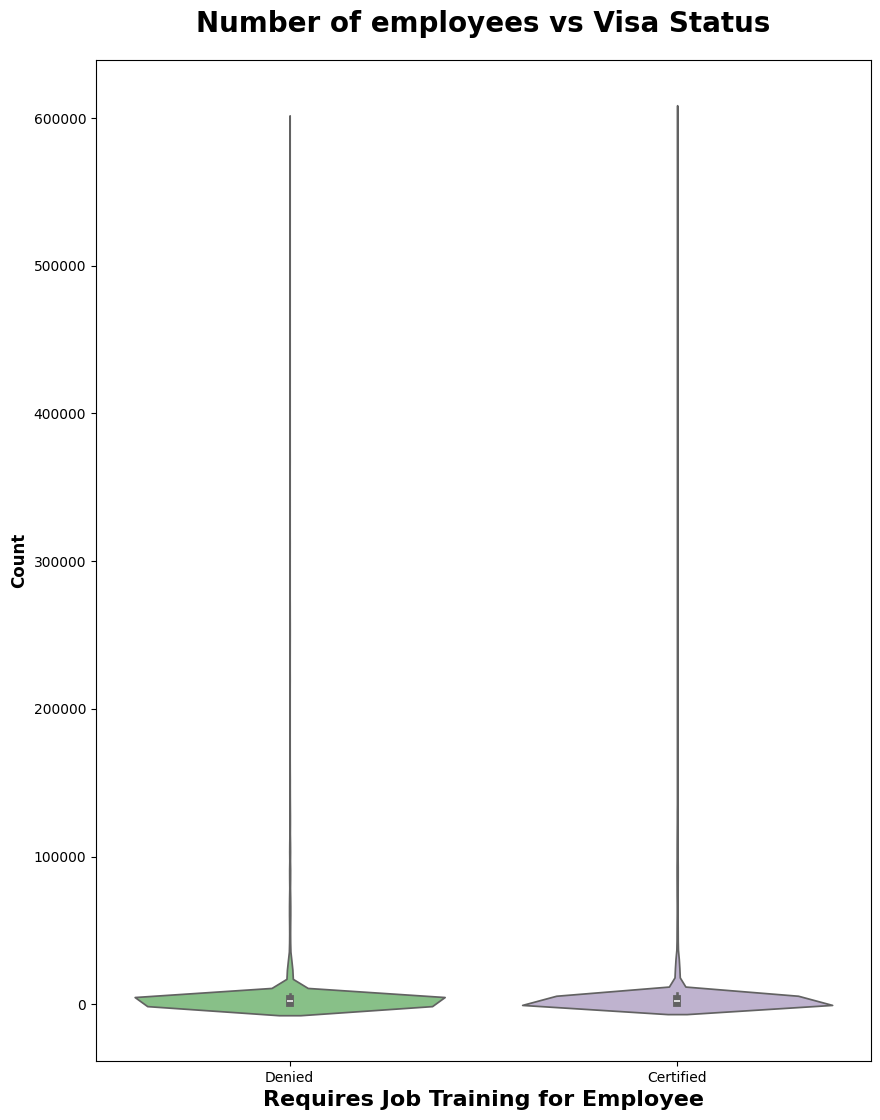

In [55]:
# Does Number of employees of employer has any impact on Visa status?

plt.subplots(figsize = (10,13))

sns.violinplot(x = "case_status" , y = 'no_of_employees', data = df, palette = "Accent")
plt.title("Number of employees vs Visa Status" , weight = "bold" , fontsize = 20 , pad = 20)
plt.ylabel("Count", weight = "bold" , fontsize = 12)
plt.xlabel("Requires Job Training for Employee", weight = "bold", fontsize = 16)
plt.ylim()
plt.show()

### Insights

- The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

In [56]:
# Wages and its impact on Visa status

df['unit_of_wage'].unique()

array(['Hour', 'Year', 'Week', 'Month'], dtype=object)

In [57]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize = True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

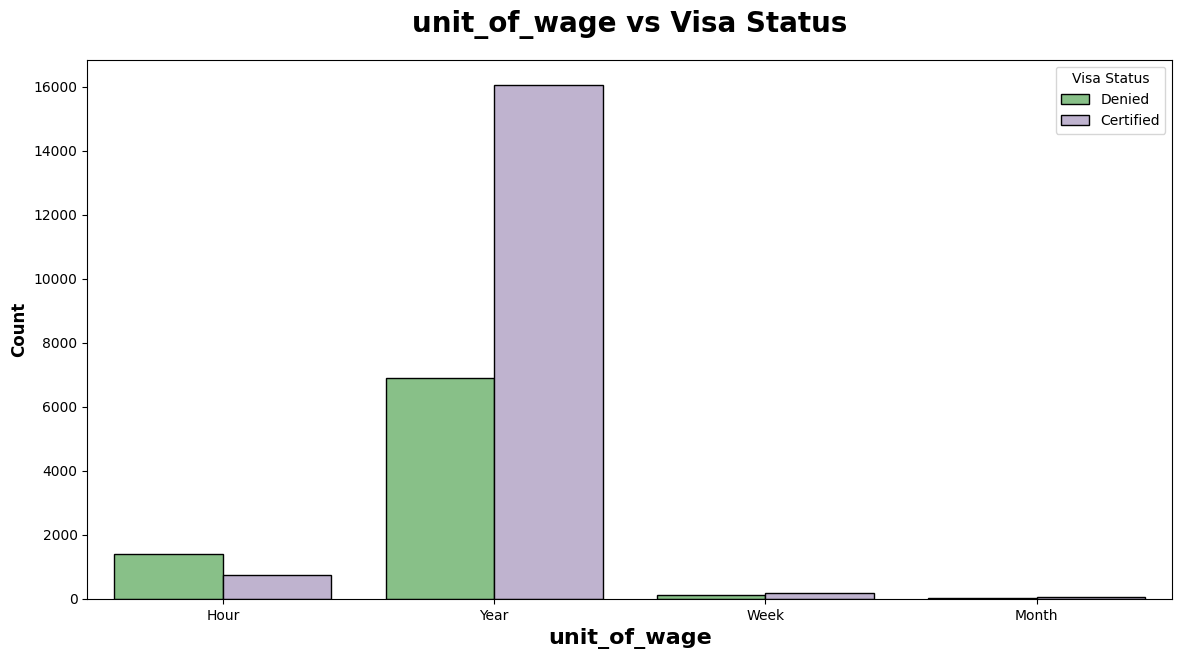

In [58]:
plt.subplots(figsize = (14,7))

sns.countplot(x = "unit_of_wage" , hue = "case_status" , data = df, ec = "black" , palette = "Accent")
plt.title("unit_of_wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight = "bold" , fontsize = 12)
plt.xlabel("unit_of_wage", weight = "bold", fontsize = 16)
plt.legend(title = "Visa Status" , fancybox = True)
plt.show()

C:\Users\tipto\AppData\Local\Temp\ipykernel_4652\3664033646.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


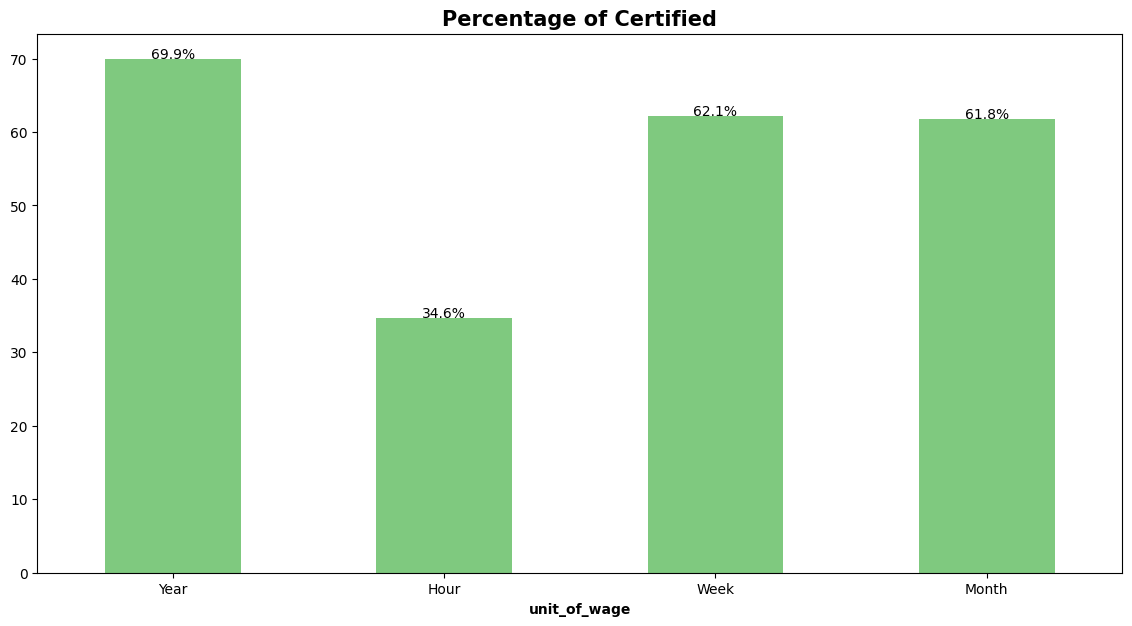

In [59]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### Report

- For employees who applied for hourly pay 65% of them were denied.
- Yearly unit wage application were accepted for 69% and denied for 31% of the time.
- There is a higher chance of yearly contract than other and immediately followed by week and month.

In [60]:
# Does Region of employment has impact on Visa status ? 

df.groupby('region_of_employment')['case_status'].value_counts(normalize = True)

region_of_employment  case_status
Island                Certified      0.602667
                      Denied         0.397333
Midwest               Certified      0.755282
                      Denied         0.244718
Northeast             Certified      0.629048
                      Denied         0.370952
South                 Certified      0.700157
                      Denied         0.299843
West                  Certified      0.622533
                      Denied         0.377467
Name: proportion, dtype: float64

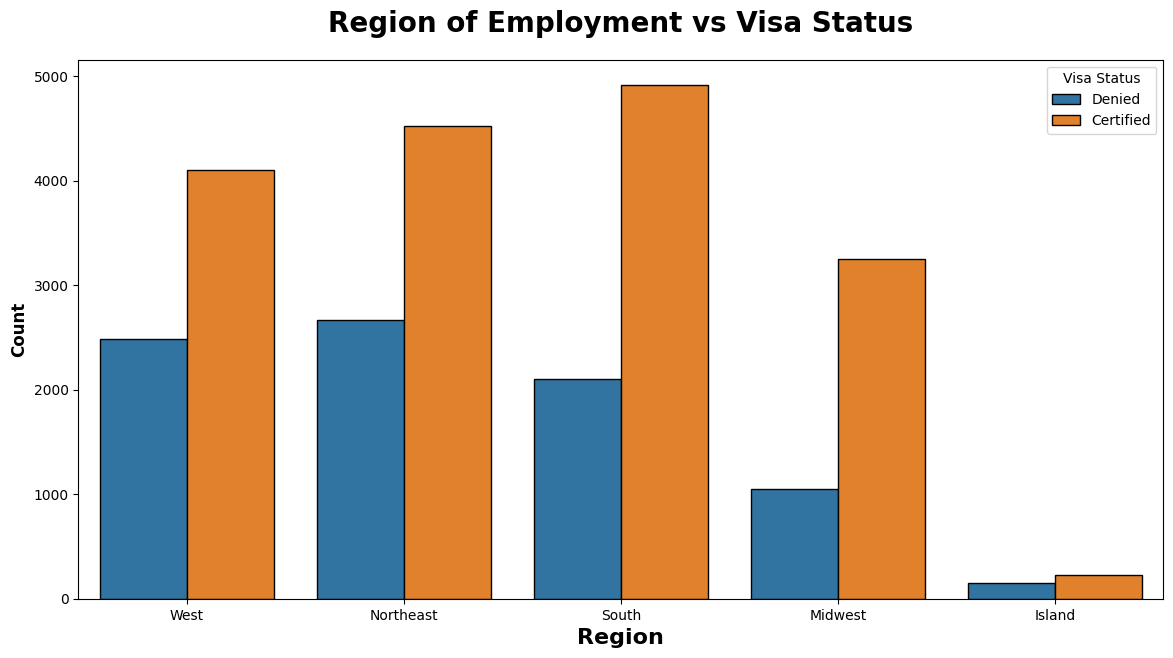

In [61]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

C:\Users\tipto\AppData\Local\Temp\ipykernel_4652\817005242.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


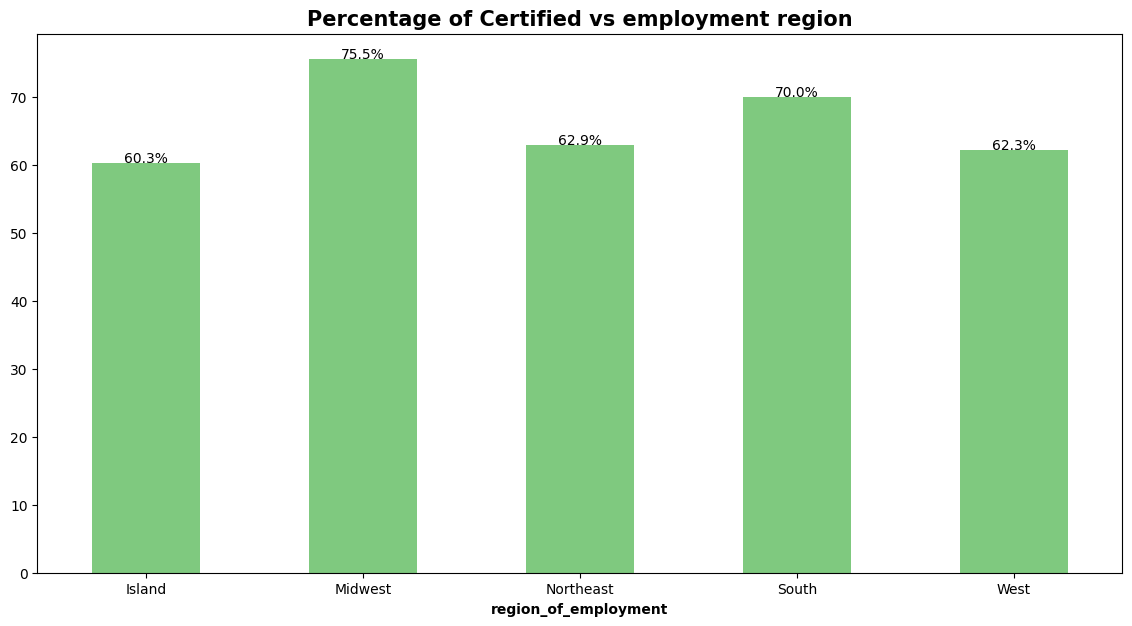

In [62]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### Report

- As per chart all the region have very similar pattern of getting Visa certified and Denied.


In [64]:
# Does Prevailing wage has any impact on Visa status ? 

# df.groupby('prevailing_wage')['case_status'].value_counts(normalize = True)

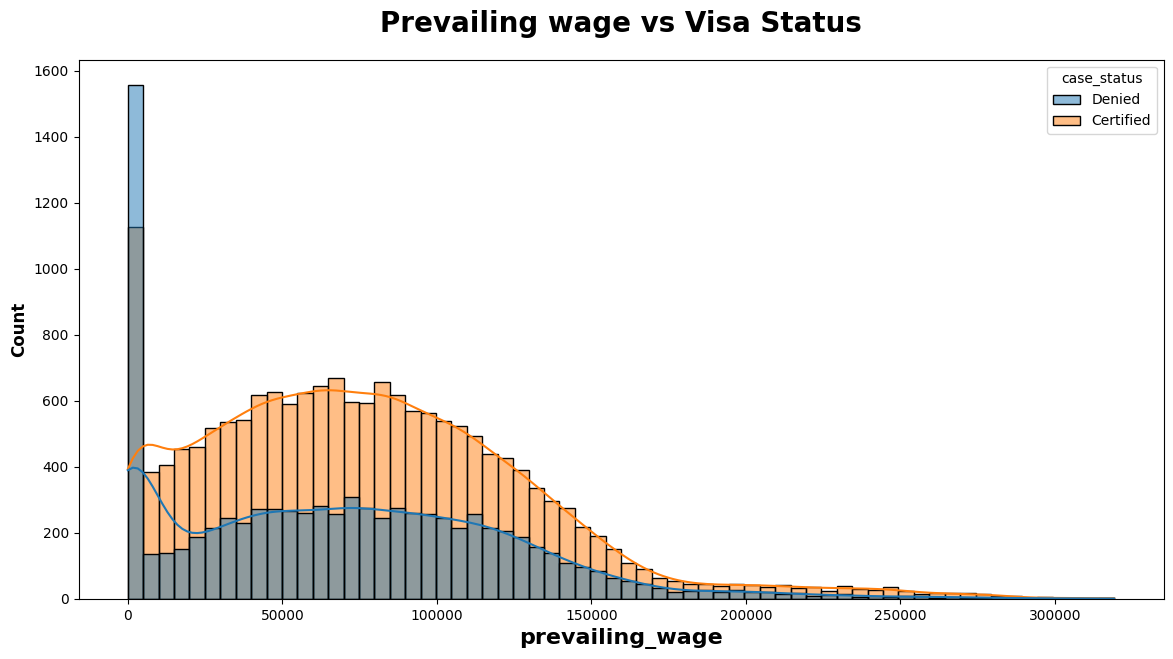

In [66]:
plt.subplots(figsize = (14,7))

sns.histplot(x = "prevailing_wage" , hue = "case_status", data = df, kde = True)
plt.title("Prevailing wage vs Visa Status", weight = "bold",fontsize = 20, pad = 20)
plt.xlabel("prevailing_wage", weight = "bold", fontsize = 16)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

### Note:
- Distribution are almost same but right skewed need to handle outliers.

In [68]:
# Does prevailing_wage vary based on education? 

df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by = "prevailing_wage" , ascending = False)

,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


C:\Users\tipto\AppData\Local\Temp\ipykernel_4652\1429189063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = "education_of_employee" , x = "prevailing_wage" , data = df , palette = 'bright')


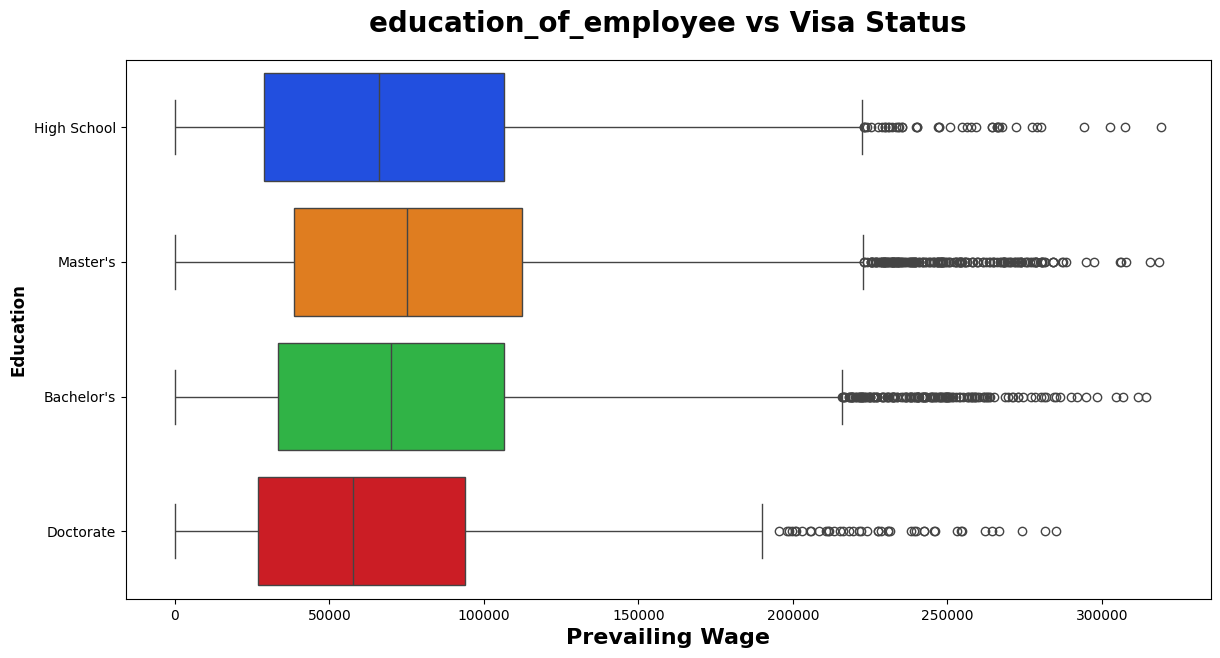

In [69]:
plt.subplots(figsize = (14,7))
sns.boxplot(y = "education_of_employee" , x = "prevailing_wage" , data = df , palette = 'bright')
plt.title("education_of_employee vs Visa Status", weight = "bold",fontsize = 20, pad = 20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

### Note

- Master's degree people are getting more wage.
- Doctrate are getting lowest, which is strange.

In [70]:
# Does prevailing_wage vary based on job experience? 

df.groupby('has_job_experience')['prevailing_wage'].mean().to_frame().sort_values(by = "prevailing_wage" , ascending = False)

,prevailing_wage
has_job_experience,
N,75464.159920
Y,73728.405363


### Note

- No job exp people are getting more wage. STRANGE!!
- But difference is not so high.

In [71]:
# Does continent has any impact on wage?

df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by = "prevailing_wage" , ascending = False)

,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


### Note:
- Asian are getting more.
- Surprisinglg Europe people are getting the lowest.

In [74]:
# Does unit_of_wage has any impact on wage?

df.groupby('unit_of_wage')['prevailing_wage'].mean().to_frame().sort_values(by = "prevailing_wage" , ascending = False)

,prevailing_wage
unit_of_wage,
Month,87592.864045
Week,85606.820515
Year,81228.077133
Hour,414.570513


### Note:
- Month unit wage are getting more wage and hour is the lowest.

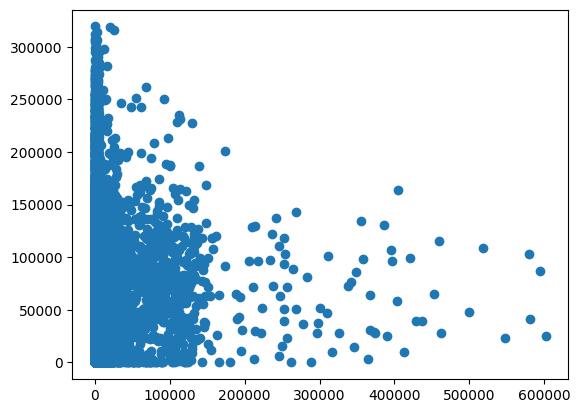

In [75]:
# Does number of employee matters for wage?
plt.scatter(df['no_of_employees'] , df['prevailing_wage'])
plt.show()

### Note: 
- If no_of_employee are low then people are getting more wage 

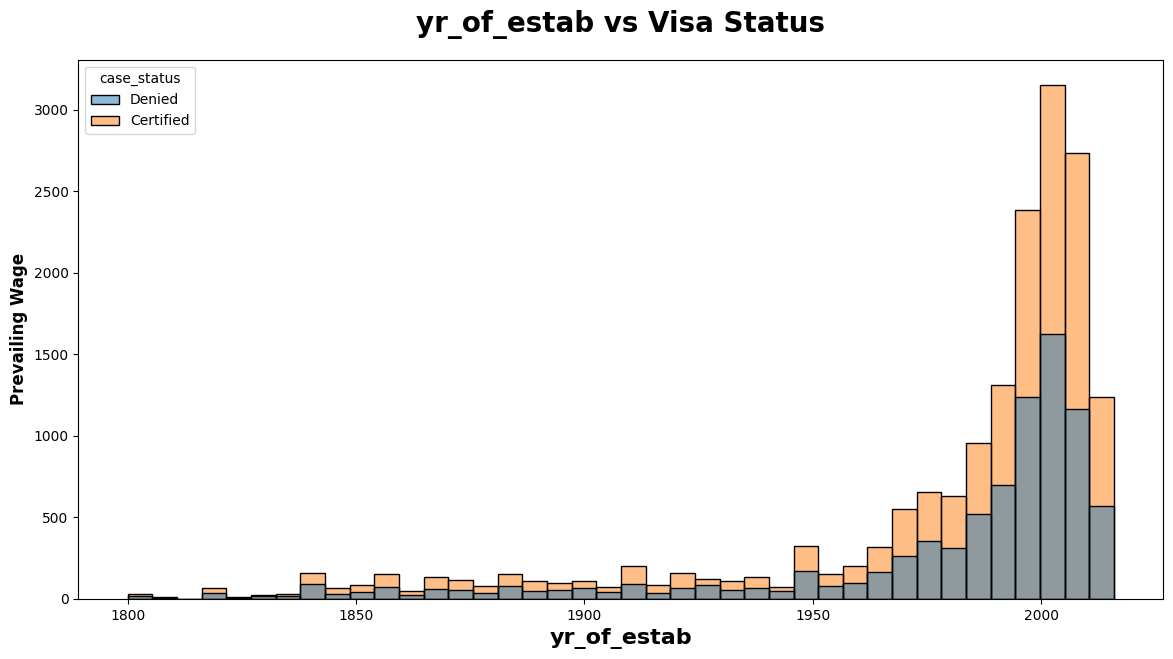

In [76]:
# Does year of establishment effect case_status?


plt.subplots(figsize = (14 , 7))

sns.histplot(x = "yr_of_estab", data = df , bins = 40, hue = 'case_status')
plt.title("yr_of_estab vs Visa Status" , weight = "bold" , fontsize = 20 , pad = 20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

In [72]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [73]:
df['unit_of_wage'].unique()

array(['Hour', 'Year', 'Week', 'Month'], dtype=object)